In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv('hire.csv')

In [8]:
df=pd.read_csv("lr.csv")
df

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [7]:
print(df.to_string( ))

        ID   model  engine_power  age_in_days      km  previous_owners        lat        lon  price
0        1  lounge            51          882   25000                1  44.907242   8.611560   8900
1        2     pop            51         1186   32500                1  45.666359  12.241890   8800
2        3   sport            74         4658  142228                1  45.503300  11.417840   4200
3        4  lounge            51         2739  160000                1  40.633171  17.634609   6000
4        5     pop            73         3074  106880                1  41.903221  12.495650   5700
5        6     pop            74         3623   70225                1  45.000702   7.682270   7900
6        7  lounge            51          731   11600                1  44.907242   8.611560  10750
7        8  lounge            51         1521   49076                1  41.903221  12.495650   9190
8        9   sport            73         4049   76000                1  45.548000  11.549470   5600


In [12]:
df.shape

(1538, 9)

In [14]:
null= df.isnull()

In [15]:
null.sum()

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [18]:
na= df.isna()

In [19]:
na.sum()

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [21]:
df.count()

ID                 1538
model              1538
engine_power       1538
age_in_days        1538
km                 1538
previous_owners    1538
lat                1538
lon                1538
price              1538
dtype: int64

In [22]:
df.corr()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
ID,1.000000,-0.034059,-0.060753,-0.006537,0.007803,-0.058207,0.058941,0.028516
engine_power,-0.034059,1.000000,0.319190,0.285495,-0.005030,0.005721,-0.005032,-0.277235
age_in_days,-0.060753,0.319190,1.000000,0.833890,0.075775,0.062982,-0.042667,-0.893328
km,-0.006537,0.285495,0.833890,1.000000,0.097539,0.035519,0.004839,-0.859373
previous_owners,0.007803,-0.005030,0.075775,0.097539,1.000000,0.001697,-0.026836,-0.076274
lat,-0.058207,0.005721,0.062982,0.035519,0.001697,1.000000,-0.766646,-0.011733
lon,0.058941,-0.005032,-0.042667,0.004839,-0.026836,-0.766646,1.000000,-0.003541
price,0.028516,-0.277235,-0.893328,-0.859373,-0.076274,-0.011733,-0.003541,1.000000


In [24]:
temp = df.drop(columns=['ID','model','lat','lon'])

In [25]:
temp

,engine_power,age_in_days,km,previous_owners,price
0,51,882,25000,1,8900
1,51,1186,32500,1,8800
2,74,4658,142228,1,4200
3,51,2739,160000,1,6000
4,73,3074,106880,1,5700
...,...,...,...,...,...
1533,51,3712,115280,1,5200
1534,74,3835,112000,1,4600
1535,51,2223,60457,1,7500
1536,51,2557,80750,1,5990


In [26]:
temp.corr()

,engine_power,age_in_days,km,previous_owners,price
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328
km,0.285495,0.833890,1.000000,0.097539,-0.859373
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000


In [27]:
df['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [47]:
dfsport = df.loc[df['model'] == 'sport']
dflounge = df.loc[df['model'] == 'lounge']
dfpop = df.loc[df['model'] == 'pop']
print(dfsport.shape)
print(dflounge.shape)
print(dfpop.shape)

(86, 9)
(1094, 9)
(358, 9)


In [52]:
print(np.where(dfsport['age_in_days'].max()))

(array([0], dtype=int64),)


In [55]:
print(dfsport['age_in_days'].max())
print(dfsport['km'].max())
print(dfsport['previous_owners'].max())

4658
190000
4


In [56]:
print(dfsport['age_in_days'].min())
print(dfsport['km'].min())
print(dfsport['previous_owners'].min())

517
6200
1


In [57]:
print(dfsport['age_in_days'].mean())
print(dfsport['km'].mean())
print(dfsport['previous_owners'].mean())

3310.3720930232557
103382.80232558139
1.2674418604651163


In [58]:
dfsport.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,724.406977,55.465116,3310.372093,103382.802326,1.267442,43.799563,11.436682,6275.406977
std,489.008610,8.210034,1165.134994,43041.072473,0.602435,2.126544,2.650824,1916.322860
min,3.000000,51.000000,517.000000,6200.000000,1.000000,38.112740,7.330990,3800.000000
25%,227.750000,51.000000,3020.750000,72425.000000,1.000000,41.757082,9.205970,4892.500000
50%,765.500000,51.000000,3684.000000,102400.000000,1.000000,45.013901,11.330880,5800.000000
75%,1082.000000,56.250000,4139.000000,129973.000000,1.000000,45.526340,13.233512,6900.000000
max,1534.000000,74.000000,4658.000000,190000.000000,4.000000,46.792019,18.168011,10800.000000


In [64]:
import sklearn 

In [21]:
from sklearn.linear_model import LinearRegression

In [71]:
dfsport

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
2,3,sport,74,4658,142228,1,45.503300,11.41784,4200
8,9,sport,73,4049,76000,1,45.548000,11.54947,5600
9,10,sport,51,3653,89000,1,45.438301,10.99170,6000
27,28,sport,51,3531,100000,1,40.976452,14.17228,4950
33,34,sport,51,3927,140000,2,40.755932,14.69019,5200
...,...,...,...,...,...,...,...,...,...
1498,1499,sport,51,1400,60000,1,45.802021,9.18779,10800
1501,1502,sport,51,3774,161900,1,44.906120,7.67723,4500
1504,1505,sport,51,4322,95000,1,40.928501,14.20367,4500
1531,1532,sport,73,4505,127000,1,45.528511,9.59323,4750


In [23]:
X =dfsport.drop(columns=['ID','model','engine_power','lat','lon','price'])
Y = dfsport['price']

NameError: name 'dfsport' is not defined

In [22]:
model = LinearRegression()
model.fit(X,Y)

NameError: name 'X' is not defined

In [92]:
ans = model.predict([[2190,70000,1],[2190,70000,2]])
ans

array([8017.82458566, 7910.56801183])

In [96]:
age = int(input("Enter the age of the car : "))
km = int(input("Enter the no of km : "))
owner = int(input("Enter no of owners : "))
price = model.predict([[age,km,owner]])
print("Price : ",price)

Enter the age of the car : 4658
Enter the no of km : 142228
Enter no of owners : 1
Price :  [4258.47604219]


In [100]:
a= int(input("Enter the number of cars: "))
for i in range(1,a+1):
    car_type = input("Enter the car type:")
    if(car_type =="sport"):
        X =dfsport.drop(columns=['ID','model','engine_power','lat','lon','price'])
        Y = dfsport['price']
        age = int(input("Enter the age of sport car : "))
        km = int(input("Enter the no of km : "))
        owner = int(input("Enter no of owners : "))
        price = model.predict([[age,km,owner]])
        print("Price : ",price)
        print()
    elif(car_type =="lounge"):
        X =dflounge.drop(columns=['ID','model','engine_power','lat','lon','price'])
        Y = dflounge['price']
        age = int(input("Enter the age of lounge car : "))
        km = int(input("Enter the no of km : "))
        owner = int(input("Enter no of owners : "))
        price = model.predict([[age,km,owner]])
        print("Price : ",price)
        print()
    elif(car_type =="pop"):
        X =dfpop.drop(columns=['ID','model','engine_power','lat','lon','price'])
        Y = dfpop['price']
        age = int(input("Enter the age pop the car : "))
        km = int(input("Enter the no of km : "))
        owner = int(input("Enter no of owners : "))
        price = model.predict([[age,km,owner]])
        print("Price : %d "%price)
        print()

Enter the number of cars: 1
Enter the car type:pop
Enter the age pop the car : 4563
Enter the no of km : 5896321
Enter no of owners : 1
Price : -64776 



In [124]:
car_type = input("Model:")
if(car_type != "sport" and car_type!= "lounge" and car_type!="pop"):
    print("enter a valid car type")
else:
    a= int(input("Enter the number of cars: "))
    list = []
    for i in range(1,a+1):
        if(car_type =="sport"):
            X =dfsport.drop(columns=['ID','model','engine_power','lat','lon','price'])
            Y = dfsport['price']
            age = int(input(f"Enter the age of sport car{i} : "))
            km = int(input("Enter the no of km : "))
            owner = int(input("Enter no of owners : "))
            price = model.predict([[age,km,owner]])
            list.append(price[0])
        elif(car_type =="lounge"):
            X =dflounge.drop(columns=['ID','model','engine_power','lat','lon','price'])
            Y = dflounge['price']
            age = int(input("Enter the age of lounge car : "))
            km = int(input("Enter the no of km : "))
            owner = int(input("Enter no of owners : "))
            price = model.predict([[age,km,owner]])
            list.append(price[0])
        elif(car_type =="pop"):
            X =dfpop.drop(columns=['ID','model','engine_power','lat','lon','price'])
            Y = dfpop['price']
            age = int(input("Enter the age pop the car : "))
            km = int(input("Enter the no of km : "))
            owner = int(input("Enter no of owners : "))
            price = model.predict([[age,km,owner]])
            list.append(price[0])
    for j in range (1,a+1):
        print(list[j-1])

Model:2
enter a valid car type
Model:pop


In [169]:
newdf= df.drop(columns=['ID','engine_power','lat','lon','price'])
newdf1 = pd.get_dummies(newdf,dtype= int)
newdf2= df['price']
print(newdf1.to_string())
x1 = newdf1
y2 = newdf2

      age_in_days      km  previous_owners  model_lounge  model_pop  model_sport
0             882   25000                1             1          0            0
1            1186   32500                1             0          1            0
2            4658  142228                1             0          0            1
3            2739  160000                1             1          0            0
4            3074  106880                1             0          1            0
5            3623   70225                1             0          1            0
6             731   11600                1             1          0            0
7            1521   49076                1             1          0            0
8            4049   76000                1             0          0            1
9            3653   89000                1             0          0            1
10            790   43286                1             0          1            0
11            366   17500   

In [170]:
model1=LinearRegression()
model1 = model1.fit(x1,y2)

In [157]:
type1 = input("model: ")
age = int(input("Age:"))
km = int(input("km: "))
owner = int(input("owner:"))
if(type1 == "sport"):
    print(f"the price of the {type1} car is :"+str(int(model1.predict([[age,km,owner,1,0,0]])[0])))
elif(type1 == "lounge"):
    print(f"the price of the {type1} car is :"+str(int(model1.predict([[age,km,owner,1,0,0]])[0])))
elif(type1 == "pop"):
    print(f"the price of the {type1} car is :"+str(int(model1.predict([[age,km,owner,1,0,0]])[0])))

model: sport
Age:2190
km: 70000
owner:1
the price of the sport car is :7880


In [159]:
 from sklearn.model_selection import train_test_split

In [239]:
x_train,x_test,y_train,y_test = train_test_split(x1,y2,test_size=0.33,random_state = 2)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y2,test_size=0.15,random_state = 40)

In [215]:
print(x_train.shape)

(1030, 6)


In [216]:
print(x_test.shape)

(508, 6)


In [225]:
finalans = LinearRegression()
finalans.fit(x_train,y_train)
ans1 = finalans.predict(x_test)

In [240]:
finalans = LinearRegression()
finalans.fit(x_train1,y_train1)
ans2 = finalans.predict(x_test1)

In [211]:
type1 = input("model: ")
age = int(input("Age:"))
km = int(input("km: "))
owner = int(input("owner:"))
if(type1 == "sport"):
    print(f"the price of the {type1} car is :"+str(int(finalans.predict([[age,km,owner,0,0,1]])[0])))
elif(type1 == "lounge"):
    print(f"the price of the {type1} car is :"+str(int(finalans.predict([[age,km,owner,1,0,0]])[0])))
elif(type1 == "pop"):
    print(f"the price of the {type1} car is :"+str(int(finalans.predict([[age,km,owner,0,1,0]])[0])))

KeyboardInterrupt: Interrupted by user

model: sport


In [212]:
import seaborn as sns
import matplotlib as plt

<AxesSubplot:xlabel='KM', ylabel='Price'>

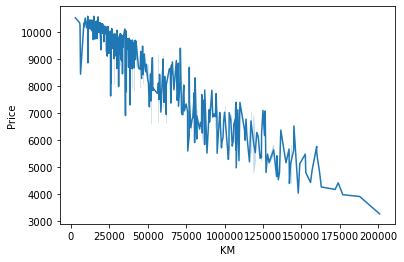

In [220]:
result = pd.DataFrame(columns=['KM','Price'])
result['KM'] = x_test['km']
result['Price'] = ans1
sns.lineplot(x='KM',y='Price',data=result)

<AxesSubplot:xlabel='KM', ylabel='Price'>

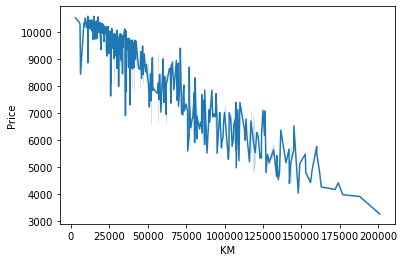

In [237]:
result1 = pd.DataFrame(columns=['KM','Price'])
result1['KM'] = x_test['km']
result1['Price'] = ans1
sns.lineplot(x='KM',y='Price',data=result1)

<AxesSubplot:xlabel='KM', ylabel='Price'>

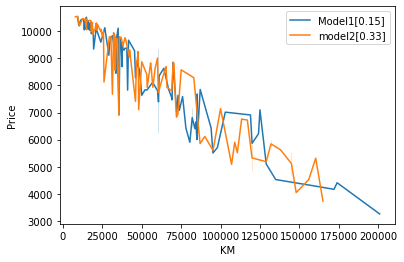

In [245]:
result = pd.DataFrame(columns=['KM','Price'])
result1 = pd.DataFrame(columns=['KM','Price'])
result['KM'] = x_test['km']
result1['KM'] = x_test1['km']
result['Price'] = ans1
result1['Price'] = ans2
sns.lineplot(x='KM',y='Price',data=result.head(100),label="Model1[0.15]")
sns.lineplot(x='KM',y='Price',data=result1.head(100),label="model2[0.33]")

In [6]:
#in class task 02-02-2024
data = pd.read_csv('hire.csv')

In [7]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [30]:
data.isna()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,True,False,False,False
1,True,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False


In [31]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].mean(),inplace=True)

In [9]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [10]:
data['experience'].fillna('zero',inplace=True)

In [11]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [1]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [16]:
from word2number import w2n

In [18]:
data.experience = data.experience.apply(w2n.word_to_num)

In [19]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [25]:
model=LinearRegression()

In [31]:
x=data.drop(columns=['salary($)'])
y=data['salary($)']
model.fit(x,y)

LinearRegression()

In [37]:
exp = int(input('total experience: '))
tst = float(input('tst_score: '))
inter = int(input('interview score : '))
ans = model.predict([[exp,tst,inter]])[0]
print("Salary : %d"%ans)

total experience: 2
tst_score: 9
interview score : 6
Salary : 53290
